# European Options

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import yfinance as yf
import pandas as pd

In [26]:
S0 = 100
r = 0.05
sigma = 0.2
sampleX = np.random.normal(0,1,10000)

def S(X_i,T):
    return S0*np.exp((r-sigma**2/2)*T+sigma*np.sqrt(T)*X_i)

In [27]:
def vanillaPayoff(X_i,T,K,m=None):
    return max(0,S(X_i,T)-K)

In [28]:
def antitheticPayoff(X_i,T,K,m=None):
    return (max(0,S(X_i,T)-K)+max(0,S(-X_i,T)-K))/2

In [55]:
def getCk(X,T,K,payoff,m=None):
    total = 0
    for X_i in X:
        total += payoff(X_i,T,K,m)
    return np.exp(-r*T)*total/len(X)

In [30]:
def getStdError(X,T,K,Ck,payoff,m=None):
    total = 0
    for X_i in X:
        total += (np.exp(-r*T)*payoff(X_i,T,K,m)-Ck)**2
    return np.sqrt(total/(len(X)-1))/np.sqrt(len(X))

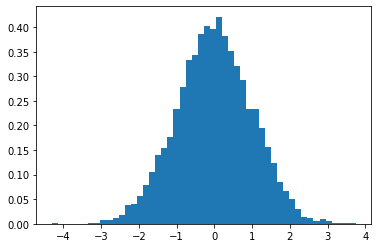

In [31]:
plt.hist(sampleX, 50, density=True)
plt.show()

# Asian Options

In [33]:
def vanillaPayoffAsian(X_i,T,K,m):
    Slist = []
    for j in range(m+1):
        Slist.append(S(X_i,j*T/m))
    return max(0,np.mean(Slist)-K)

In [41]:
def antitheticPayoffAsian(X_i,T,K,m):
    Slist = []
    minusSlist = []
    for j in range(m+1):
        Slist.append(S(X_i,j*T/m))
        minusSlist.append(S(-X_i,j*T/m))
    return (max(0,np.mean(Slist)-K)+max(0,np.mean(minusSlist)-K))/2

# Reproduction of results

### European options

In [56]:
Ks = [90,100,110]
Ts = [2,4,6,8]

print("K\tm\tCk\tstd\t~Ck\t~std")
for K in Ks:
    for T in Ts:
        Ck = round(getCk(sampleX,T,K,vanillaPayoff),4)
        antitheticCk = round(getCk(sampleX,T,K,antitheticPayoff),4)
        print(K,T,Ck,round(getStdError(sampleX,T,K,Ck,vanillaPayoff),4),
              antitheticCk,round(getStdError(sampleX,T,K,antitheticCk,antitheticPayoff),4),sep="\t")

K	m	Ck	std	~Ck	~std
90	2	21.9892	0.2486	21.9563	0.1002
90	4	30.5806	0.37	30.5339	0.1639
90	6	37.7062	0.4746	37.6475	0.221
90	8	43.8758	0.5704	43.8063	0.2757
100	2	16.0536	0.2239	16.0211	0.1113
100	4	25.1013	0.3492	25.0562	0.1742
100	6	32.6328	0.457	32.5762	0.2307
100	8	39.1834	0.5556	39.1182	0.2846
110	2	11.3761	0.1958	11.3457	0.1128
110	4	20.4173	0.3258	20.3675	0.1796
110	6	28.1256	0.4374	28.066	0.2372
110	8	34.9215	0.5391	34.854	0.2914


### Asian options

In [48]:
Ks = [90,100,110]
ms = [10,20,50,100,200,500]
T = 1

print("K\tm\tCk\tstd\t~Ck\t~std")
for K in Ks:
    for m in ms:
        Ck = round(getCk(sampleX,T,K,vanillaPayoffAsian,m),4)
        antitheticCk = round(getCk(sampleX,T,K,antitheticPayoffAsian,m),4)
        print(K,m,Ck,round(getStdError(sampleX,T,K,Ck,vanillaPayoffAsian,m),4),
            antitheticCk,round(getStdError(sampleX,T,K,antitheticCk,antitheticPayoffAsian,m),4),sep="\t")

K	m	Ck	std	~Ck	~std
90	10	12.884	0.1137	12.8591	0.0316
90	20	12.934	0.115	12.9093	0.0322
90	50	12.9634	0.1158	12.9388	0.0326
90	100	12.9728	0.116	12.9482	0.0327
90	200	12.9773	0.1162	12.9528	0.0328
90	500	12.9799	0.1162	12.9554	0.0328
100	10	6.2539	0.0886	6.2388	0.0445
100	20	6.3319	0.0898	6.3165	0.0451
100	50	6.3773	0.0904	6.3618	0.0455
100	100	6.3917	0.0906	6.3761	0.0456
100	200	6.3986	0.0907	6.383	0.0456
100	500	6.4026	0.0908	6.387	0.0457
110	10	2.4551	0.0575	2.4416	0.0369
110	20	2.5203	0.0586	2.5064	0.0375
110	50	2.5583	0.0592	2.5442	0.0379
110	100	2.5704	0.0594	2.5563	0.038
110	200	2.5762	0.0595	2.5621	0.0381
110	500	2.5795	0.0596	2.5654	0.0381
